In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([45, 85, 16, 99, 153, 42, 87])
y = np.array([69, 84, 51, 73, 13, 95, 89])

In [3]:
model = np.polyfit(x,y,1)


In [4]:
model

array([-0.29704205, 90.07730852])

In [5]:
predict = np.poly1d(model)
predict(65)

70.76957535733254

In [6]:
y_predict = predict(x)
y_predict

array([76.71041633, 64.82873438, 85.32463574, 60.6701457 , 44.62987508,
       77.60154248, 64.23465029])

In [7]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.22909940125730266

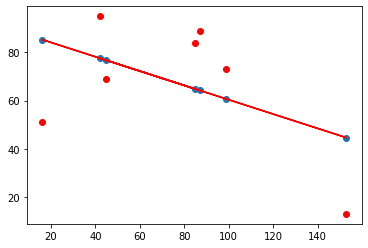

In [8]:
yLine = model[1] + model[0]*x
plt.plot(x, yLine, c = 'r')
plt.scatter(x, y_predict)
plt.scatter(x, y, c='r')

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
df = pd.DataFrame(boston.data)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
df.columns = boston.feature_names

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
df['price'] = boston.target

In [15]:
df['price']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [16]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

<AxesSubplot:>

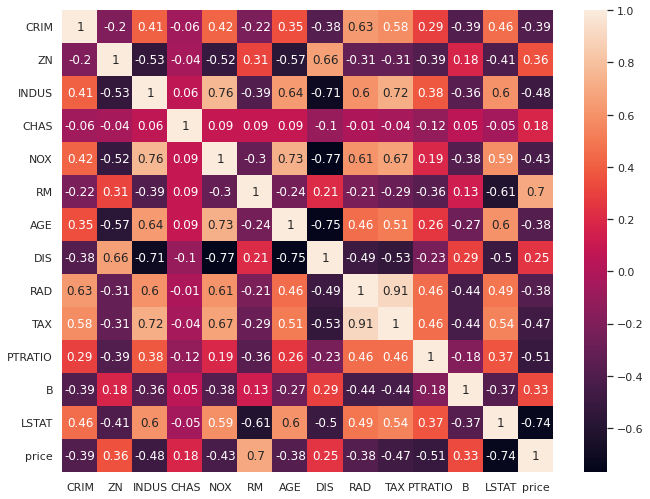

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_predict)
mse
import seaborn as sns

sns.set(rc = {'figure.figsize' : (11, 8.5)})
corr_mat = df.corr().round(2)
sns.heatmap(data = corr_mat, annot = True)

In [17]:
x = df[['LSTAT', 'PTRATIO', 'RM', 'CRIM', 'INDUS', 'NOX', 'AGE']]
y = df['price']
x

,LSTAT,PTRATIO,RM,CRIM,INDUS,NOX,AGE
0,4.98,15.3,6.575,0.00632,2.31,0.538,65.2
1,9.14,17.8,6.421,0.02731,7.07,0.469,78.9
2,4.03,17.8,7.185,0.02729,7.07,0.469,61.1
3,2.94,18.7,6.998,0.03237,2.18,0.458,45.8
4,5.33,18.7,7.147,0.06905,2.18,0.458,54.2
...,...,...,...,...,...,...,...
501,9.67,21.0,6.593,0.06263,11.93,0.573,69.1
502,9.08,21.0,6.120,0.04527,11.93,0.573,76.7
503,5.64,21.0,6.976,0.06076,11.93,0.573,91.0
504,6.48,21.0,6.794,0.10959,11.93,0.573,89.3


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state = 5)

In [20]:
import sklearn
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(xtrain, ytrain)
lm.score(xtest, ytest)

0.6976828171840126

In [23]:
ytrain_predict = lm.predict(xtrain)
ytest_predict = lm.predict(xtest)

<AxesSubplot:>

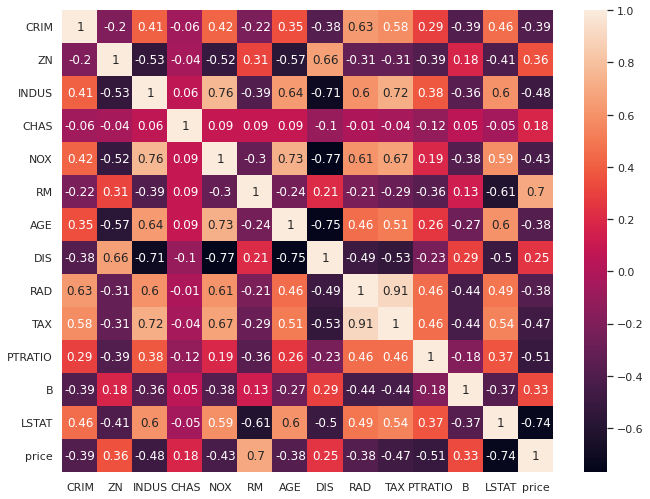

In [24]:
0.6976828171840126

In [25]:
mse = mean_squared_error(ytrain, ytrain_predict)
mse

27.511346554934484

/home/pict/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


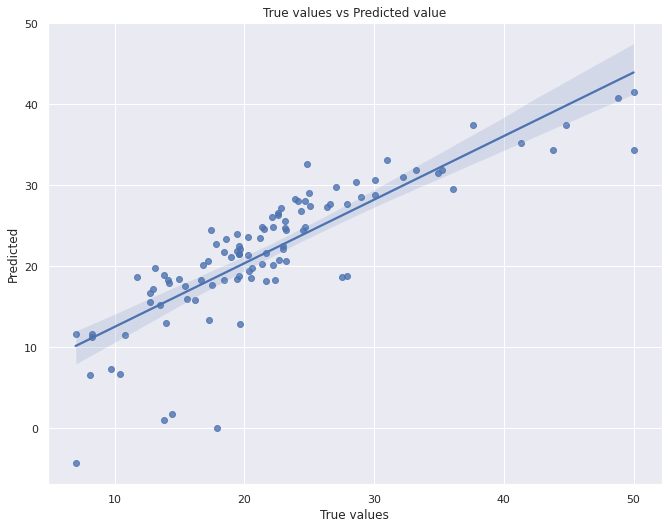

In [26]:
sns.regplot(ytest, ytest_predict)
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True values vs Predicted value")
plt.plot()
plt.show()

In [27]:
sklearn.__version__

'0.24.2'